In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd

dataframes = []    
directory = '../../discovery/discovery3/discovery-duration-fixed/'

# Walk through each subdirectory of working directory
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith("-results.csv"):
            dataframes.append(pd.read_csv(os.path.join(root,file),sep=','))

df = pd.concat(dataframes, axis=0)

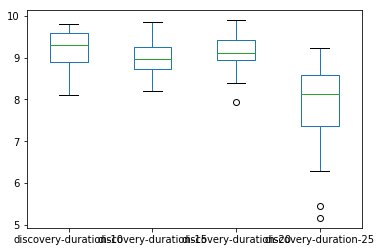

In [21]:
df.groupby(['test', 'pass'])['duration'].count().div(df.groupby(['test', 'pass'])['duration'].max(), axis='index').unstack().T.plot(kind='box')